In [53]:
import math
import numpy as np
import pandas as pd
from scipy.stats import skew,kurtosis
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/honeyproduction.csv'
df=pd.read_csv(path)

Mounted at /content/drive


In [3]:
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [4]:
print(df.dtypes)

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object


In [5]:
print(df.columns)

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')


In [6]:
convert_dict = {'numcol': int,
                'yieldpercol': int,
                'totalprod':int,
                'stocks':int,
                'prodvalue':int,
                'year':int
                }

df = df.astype(convert_dict)
print(df.dtypes)

state           object
numcol           int64
yieldpercol      int64
totalprod        int64
stocks           int64
priceperlb     float64
prodvalue        int64
year             int64
dtype: object


In [8]:
print(df.describe())

              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     626.000000   626.000000  6.260000e+02  6.260000e+02  626.000000   
mean    60284.345048    62.009585  4.169086e+06  1.318859e+06    1.409569   
std     91077.087231    19.458754  6.883847e+06  2.272964e+06    0.638599   
min      2000.000000    19.000000  8.400000e+04  8.000000e+03    0.490000   
25%      9000.000000    48.000000  4.750000e+05  1.430000e+05    0.932500   
50%     26000.000000    60.000000  1.533000e+06  4.395000e+05    1.360000   
75%     63750.000000    74.000000  4.175250e+06  1.489500e+06    1.680000   
max    510000.000000   136.000000  4.641000e+07  1.380000e+07    4.150000   

          prodvalue         year  
count  6.260000e+02   626.000000  
mean   4.715741e+06  2004.864217  
std    7.976110e+06     4.317306  
min    1.620000e+05  1998.000000  
25%    7.592500e+05  2001.000000  
50%    1.841500e+06  2005.000000  
75%    4.703250e+06  2009.000000  
max    6.961500e+07  2012.

In [9]:
print(df.shape)

(626, 8)


In [10]:
print('Average production per state: ',np.mean(df['totalprod']))

Average production per state:  4169086.2619808307


In [14]:
grouped = df.groupby(df['year'])
df_new = grouped.get_group(1998)
df_new

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000,71,1136000,159000,0.72,818000,1998
1,AZ,55000,60,3300000,1485000,0.64,2112000,1998
2,AR,53000,65,3445000,1688000,0.59,2033000,1998
3,CA,450000,83,37350000,12326000,0.62,23157000,1998
4,CO,27000,72,1944000,1594000,0.70,1361000,1998
5,FL,230000,98,22540000,4508000,0.64,14426000,1998
6,GA,75000,56,4200000,307000,0.69,2898000,1998
7,HI,8000,118,944000,66000,0.77,727000,1998
8,ID,120000,50,6000000,2220000,0.65,3900000,1998
9,IL,9000,71,639000,204000,1.19,760000,1998


In [19]:
print(df.nlargest(n=10,columns=['totalprod'])['year'])

532    2010
3      1998
452    2008
492    2009
114    2000
329    2005
612    2012
572    2011
220    2003
411    2007
Name: year, dtype: int64


In [21]:
print(df.nlargest(n=1,columns=['totalprod'])['year'])

532    2010
Name: year, dtype: int64


In [22]:
print(df.nsmallest(n=1,columns=['totalprod'])['year'])

233    2003
Name: year, dtype: int64


In [23]:
print(df.nlargest(n=10,columns=['totalprod'])['state'])

532    ND
3      CA
452    ND
492    ND
114    ND
329    ND
612    ND
572    ND
220    CA
411    ND
Name: state, dtype: object


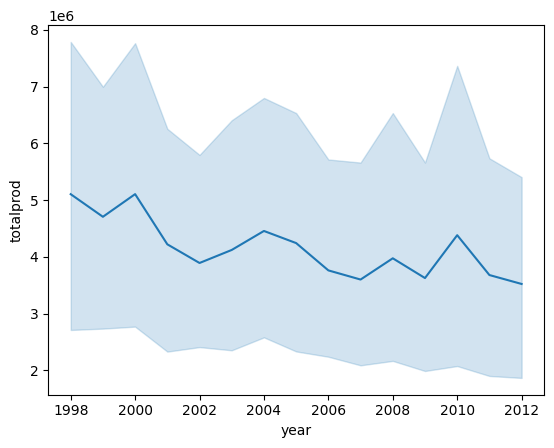

In [28]:
sns.lineplot(data=df,x=df['year'],y=df['totalprod']);

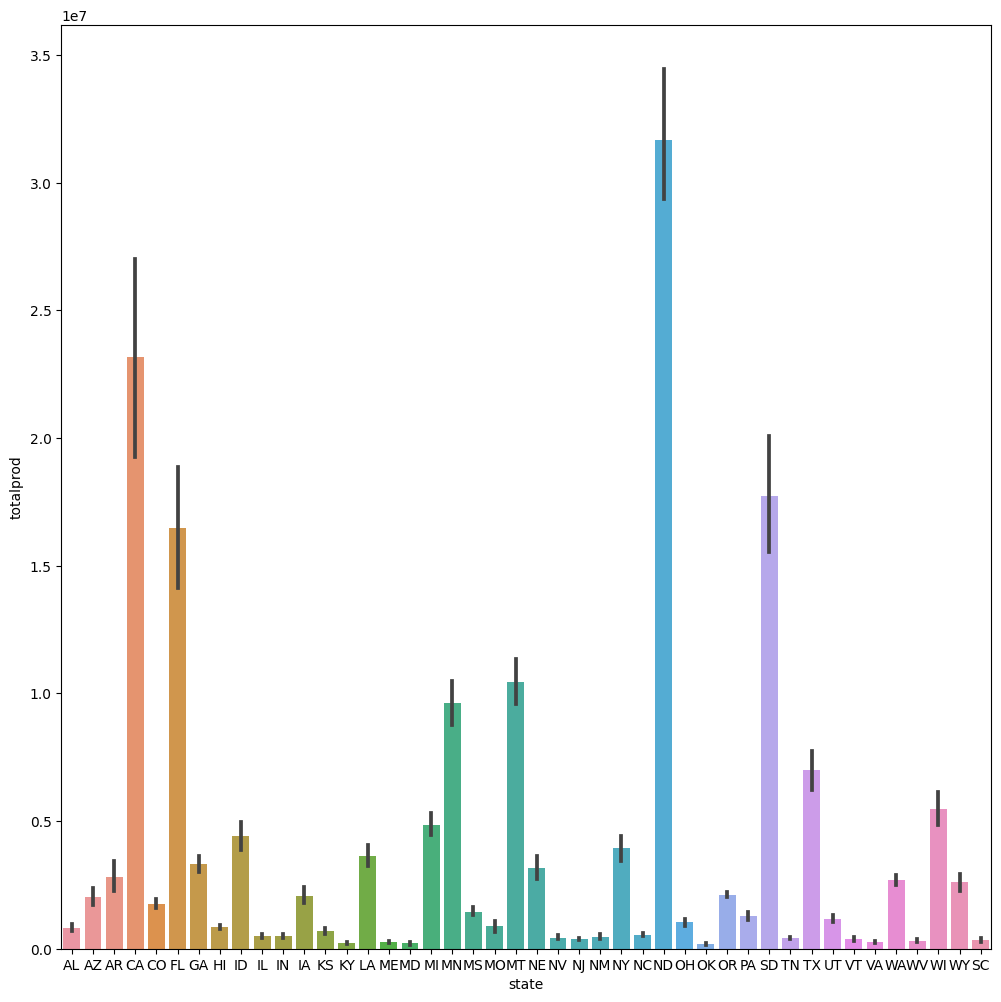

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(data=df,x=df['state'],y=df['totalprod']);
plt.show()

In [35]:
print(min(df['priceperlb']))

0.49


In [36]:
print(max(df['priceperlb']))

4.15


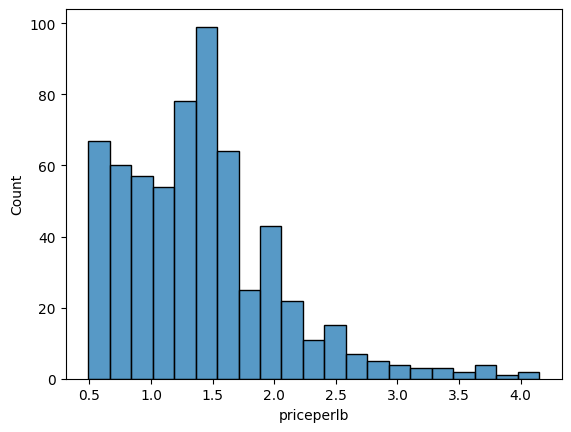

In [37]:
sns.histplot(data=df,x=df['priceperlb']);

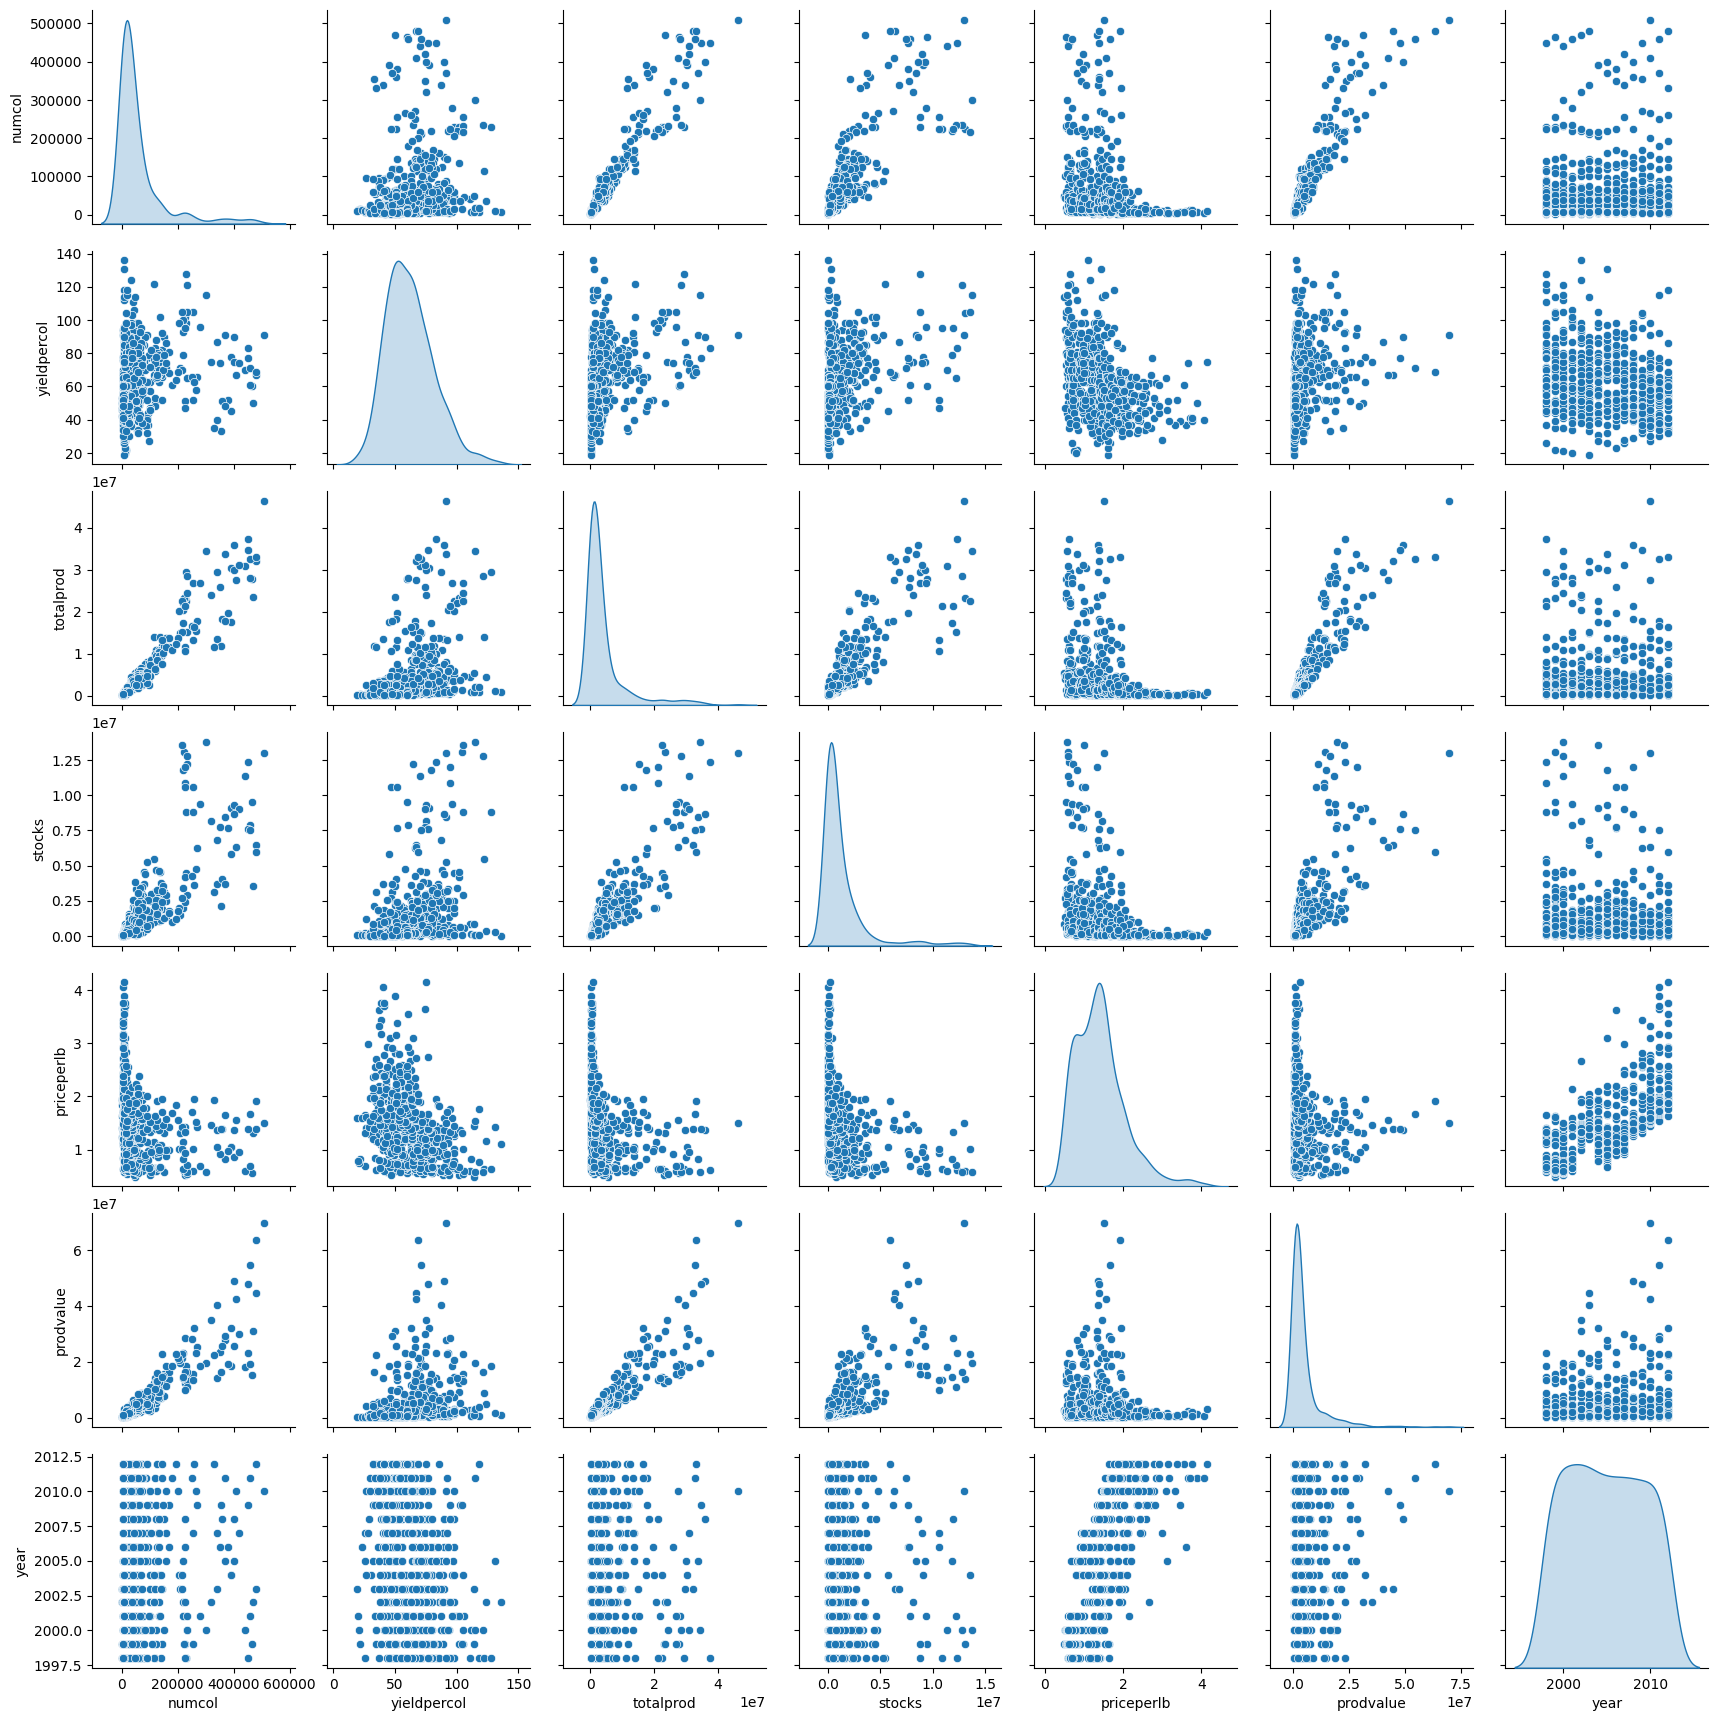

In [41]:
sns.pairplot(data=df,diag_kind='kde');
#totalprod and numcol are positively correlated
#totalprod and stocks are positively correlated
#totalprod and prodvalue are positively correlated
#stocks and numcol are positively correlated
#stocks and prodvalue are positively correlated
#prodvalue and numcol are positively correlated
#prodvalue and totalprod are positively correlated

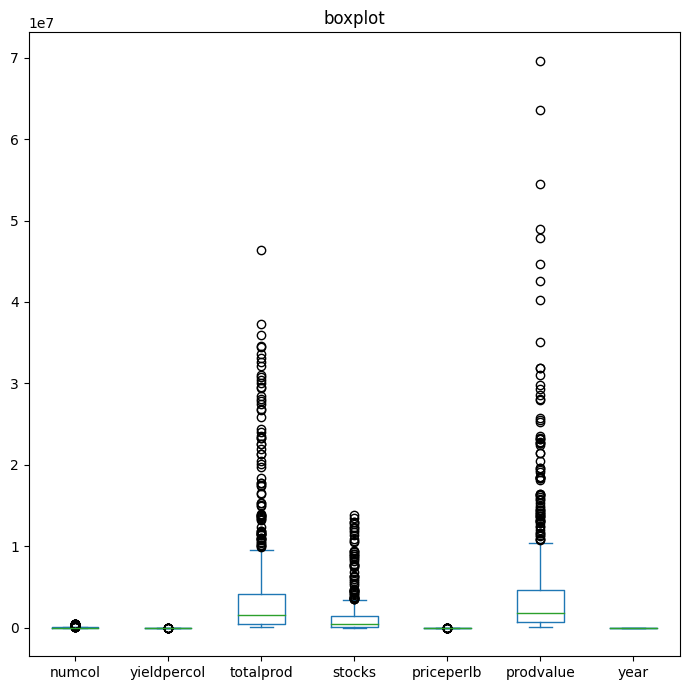

In [51]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True


ax = df[['numcol', 'yieldpercol','totalprod','stocks','priceperlb','prodvalue','year']].plot(kind='box', title='boxplot')


plt.show()
#All columns except year have outliers


In [61]:
print(skew(df['numcol'], axis=0, bias=True))
print(skew(df['yieldpercol'], axis=0, bias=True))
print(skew(df['totalprod'], axis=0, bias=True))
print(skew(df['stocks'], axis=0, bias=True))
print(skew(df['priceperlb'], axis=0, bias=True))
print(skew(df['prodvalue'], axis=0, bias=True))
print(skew(df['year'], axis=0, bias=True))

2.75564143090785
0.6917702411165997
2.8942914171003014
3.2240498452151924
1.1912571643886352
3.832703333748846
0.04644305441309413


In [62]:
print(kurtosis(df['numcol'], axis=0, bias=True))
print(kurtosis(df['yieldpercol'], axis=0, bias=True))
print(kurtosis(df['totalprod'], axis=0, bias=True))
print(kurtosis(df['stocks'], axis=0, bias=True))
print(kurtosis(df['priceperlb'], axis=0, bias=True))
print(kurtosis(df['prodvalue'], axis=0, bias=True))
print(kurtosis(df['year'], axis=0, bias=True))

7.807750657005316
0.5790666900850749
8.817488141095254
11.254446817168269
2.087379994232335
19.153109871863222
-1.2077695984693049
